In [2]:
!pip install pymongo

from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 18.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 34.4 MB/s eta 0:00:00


In [3]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE[1].csv",header=1)



In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [11]:
df=df.dropna().reset_index(drop=True)

In [12]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [14]:
df=df.drop(122).reset_index(drop=True)

In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2


In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
df.columns=df.columns.str.strip()

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [20]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [21]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [22]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [24]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [26]:
df.Classes=df.Classes.str.strip()

In [27]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [28]:
df.Classes

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
238        fire
239    not fire
240    not fire
241    not fire
242    not fire
Name: Classes, Length: 243, dtype: object

In [29]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [30]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [31]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

In [32]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [33]:
df1 = df.drop(['day','month','year'], axis=1)

In [34]:
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

In [35]:
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [36]:
df1["Classes"]

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

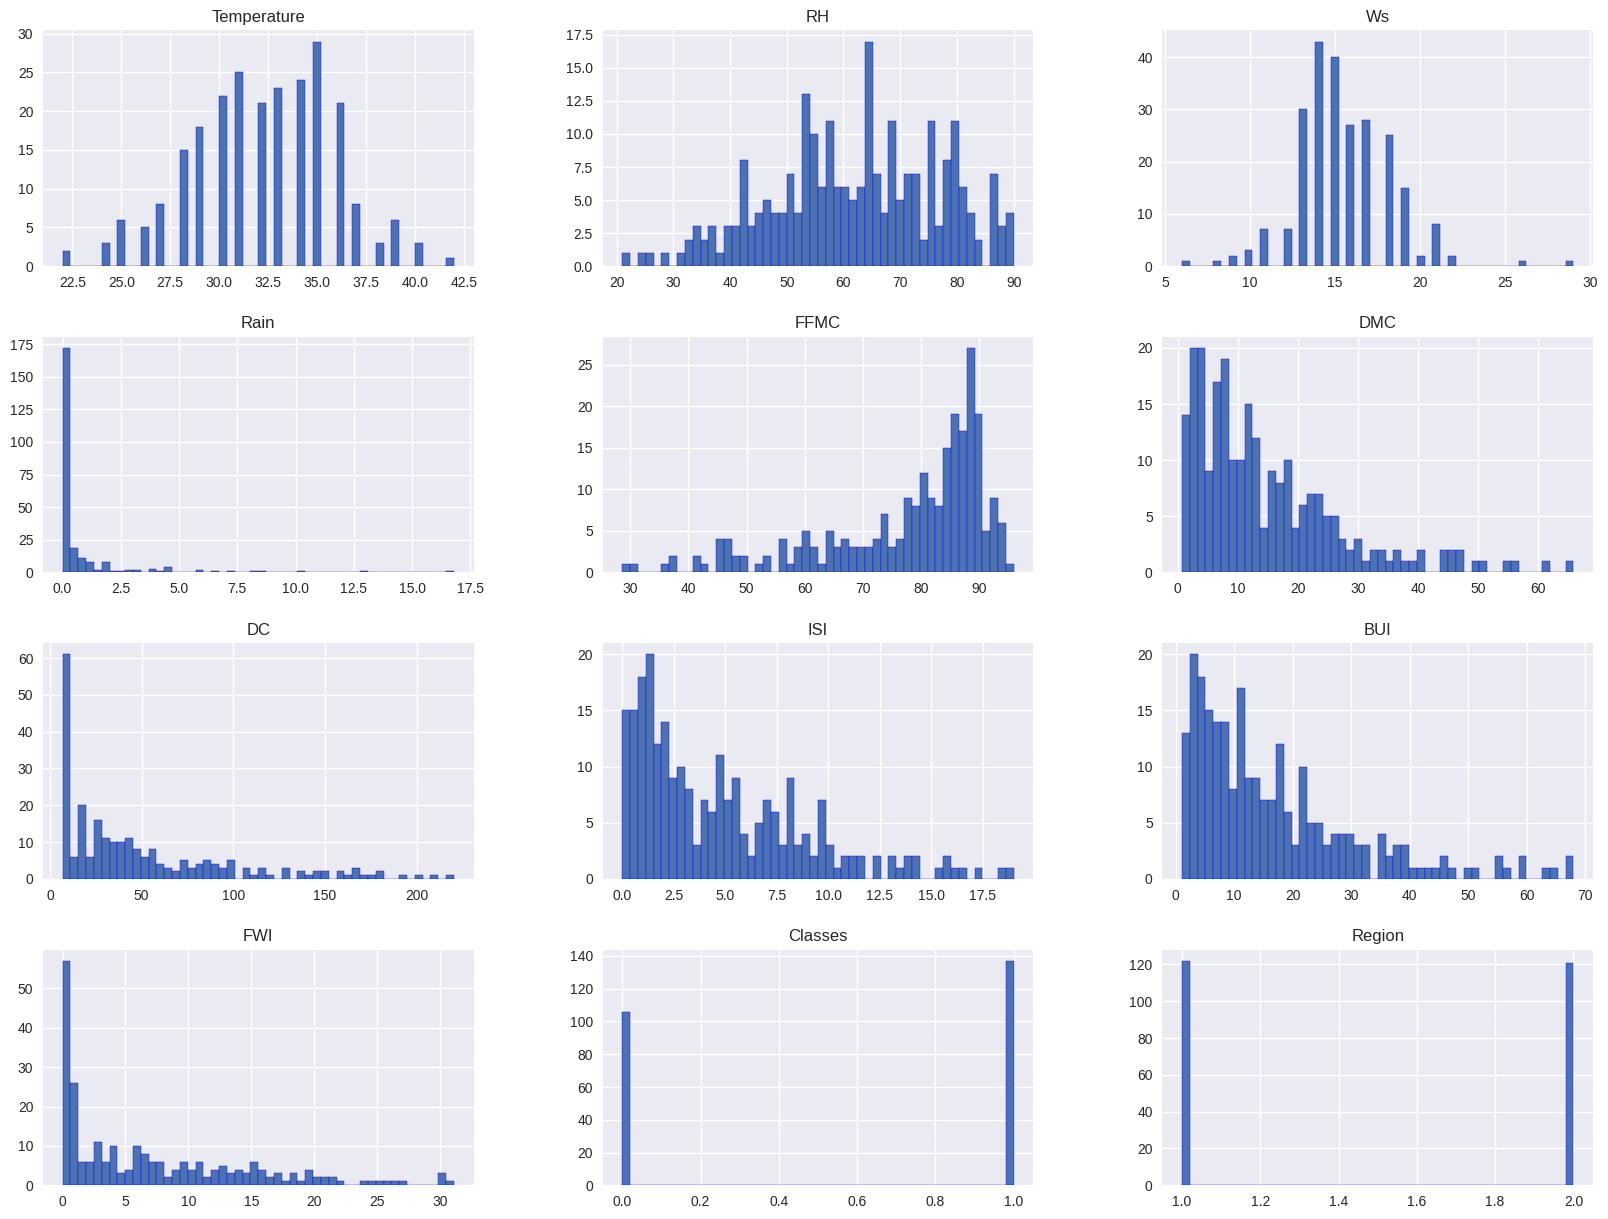

In [37]:
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [38]:
percentage = df.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

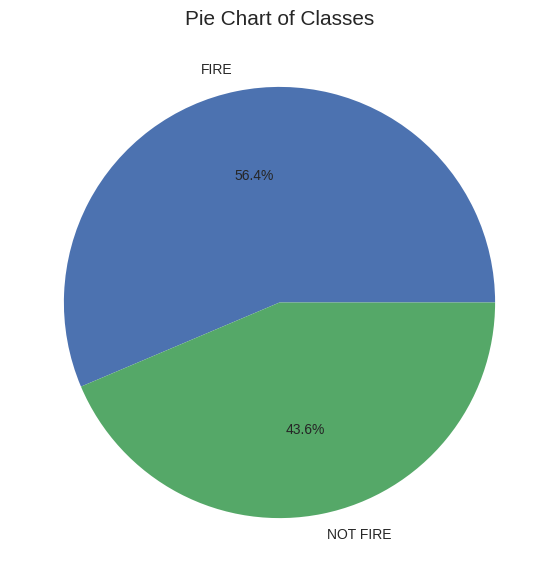

In [39]:
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

In [40]:
k = len(df1.columns)

In [41]:
k

12

In [42]:
corr=df1.corr()
cols = corr.nlargest(k, 'Classes')['Classes'].index 

In [43]:
cols

Index(['Classes', 'FFMC', 'ISI', 'FWI', 'BUI', 'DMC', 'Temperature', 'DC',
       'Region', 'Ws', 'Rain', 'RH'],
      dtype='object')

In [44]:
cm = np.corrcoef(df1[cols].values.T)

In [45]:
cm

array([[ 1.00000000e+00,  7.69492297e-01,  7.35197388e-01,
         7.19216149e-01,  5.86639489e-01,  5.85657769e-01,
         5.16015487e-01,  5.11123334e-01,  1.62346663e-01,
        -6.99636329e-02, -3.79097165e-01, -4.32160741e-01],
       [ 7.69492297e-01,  1.00000000e+00,  7.40006828e-01,
         6.91131971e-01,  5.92011015e-01,  6.03607641e-01,
         6.76568145e-01,  5.07396659e-01,  2.22240716e-01,
        -1.66548273e-01, -5.43906188e-01, -6.44873465e-01],
       [ 7.35197388e-01,  7.40006828e-01,  1.00000000e+00,
         9.22894934e-01,  6.44092598e-01,  6.80454326e-01,
         6.03870559e-01,  5.08643247e-01,  2.63197088e-01,
         8.53168910e-03, -3.47483929e-01, -6.86667043e-01],
       [ 7.19216149e-01,  6.91131971e-01,  9.22894934e-01,
         1.00000000e+00,  8.57973096e-01,  8.75864159e-01,
         5.66669878e-01,  7.39520556e-01,  1.97102329e-01,
         3.23677727e-02, -3.24421559e-01, -5.80956747e-01],
       [ 5.86639489e-01,  5.92011015e-01,  6.4409259

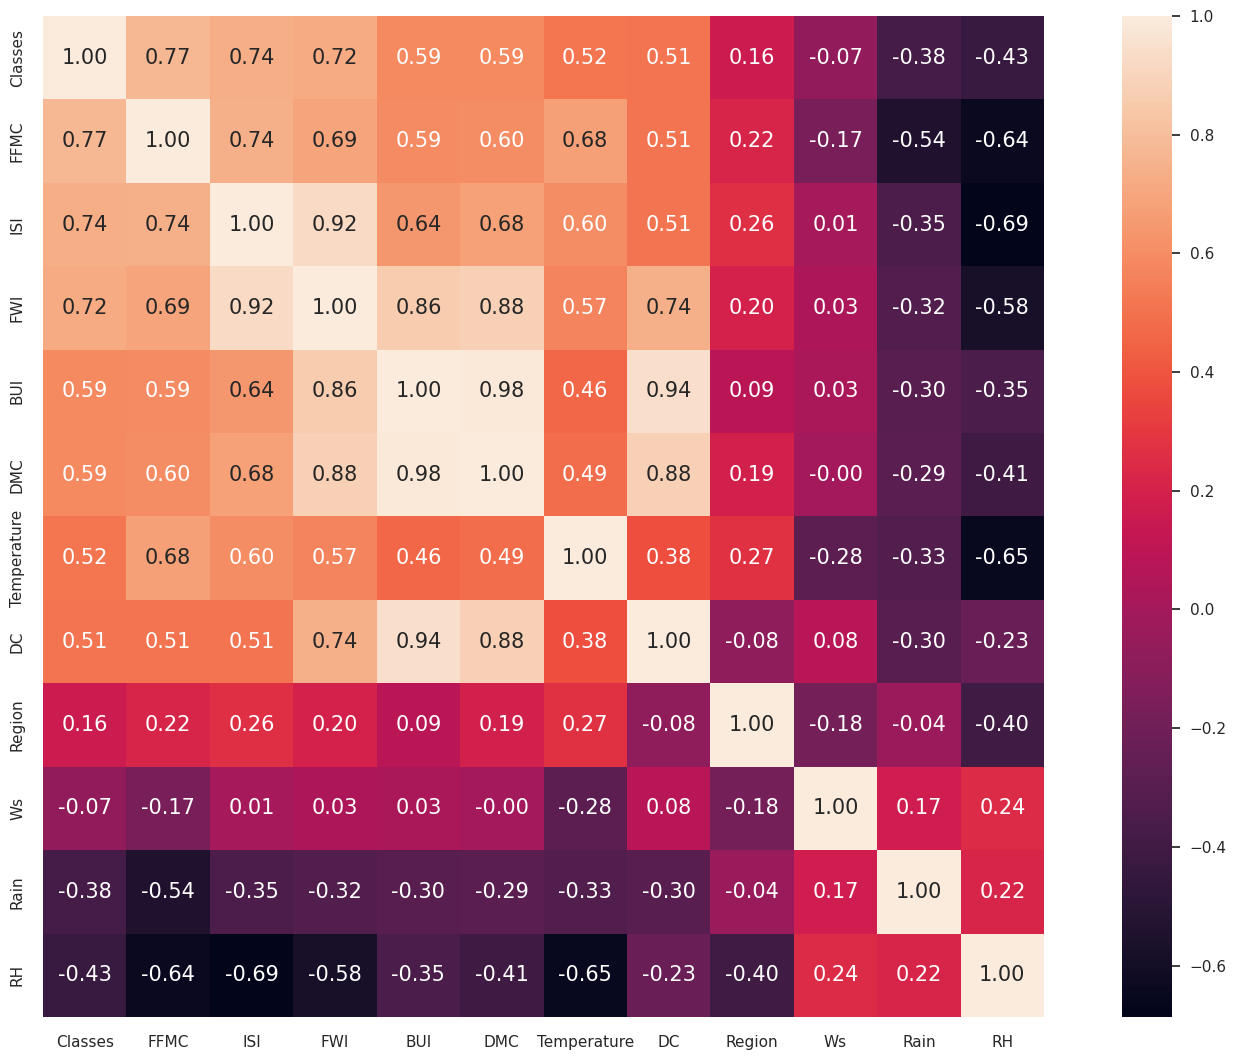

In [46]:
# Assuming df1 is a DataFrame, and corr is a DataFrame containing correlation values
k = len(df1.columns)  # Get the number of columns in df1
cols = corr.nlargest(k, 'Classes')['Classes'].index  # Select the 'k' columns with the highest correlation with 'Classes' and get their indices

# Calculate the correlation matrix for the selected columns
cm = np.corrcoef(df1[cols].values.T)

# Set the font scale for the seaborn plot
sns.set(font_scale=1)

# Create a heatmap plot
f, ax = plt.subplots(figsize=(20, 13))  # Create a subplot with a specified size
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
# Plot the heatmap with correlation values annotated, square cells, and other formatting options

# Show the plot
plt.show()


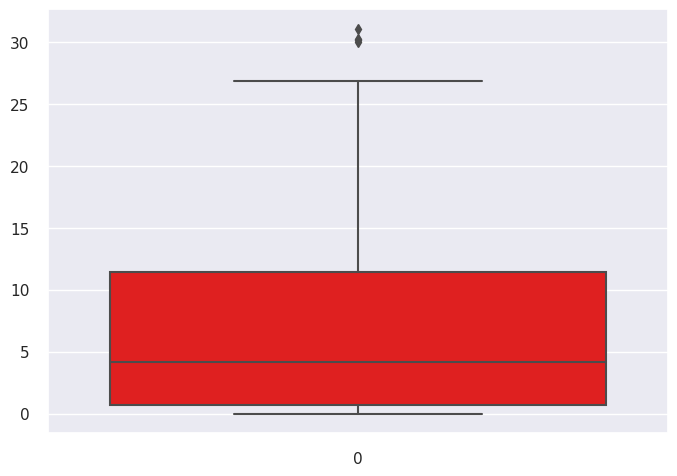

In [47]:
ax = sns.boxplot(df['FWI'], color= 'red')

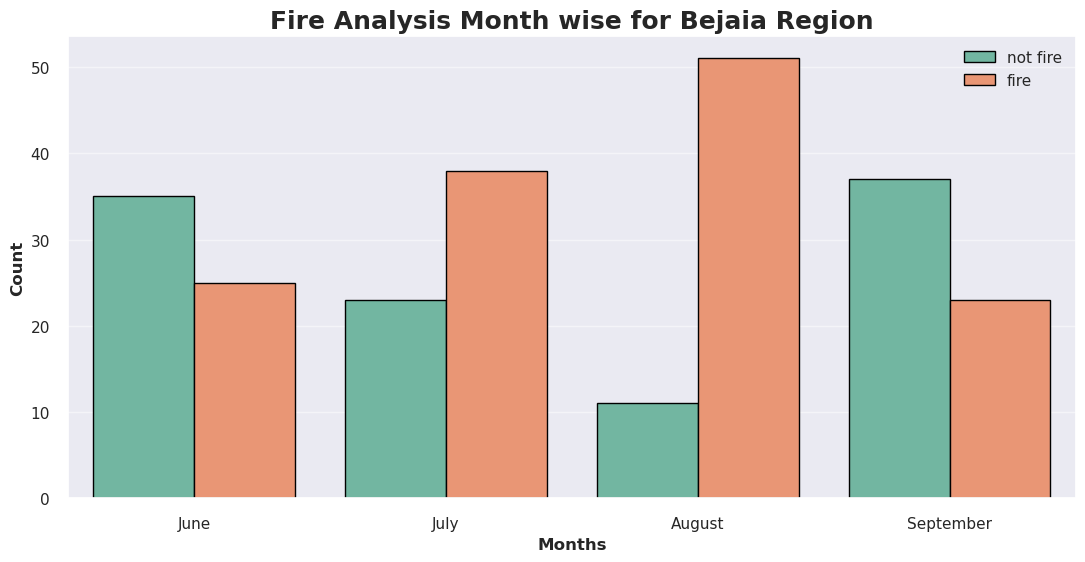

In [48]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

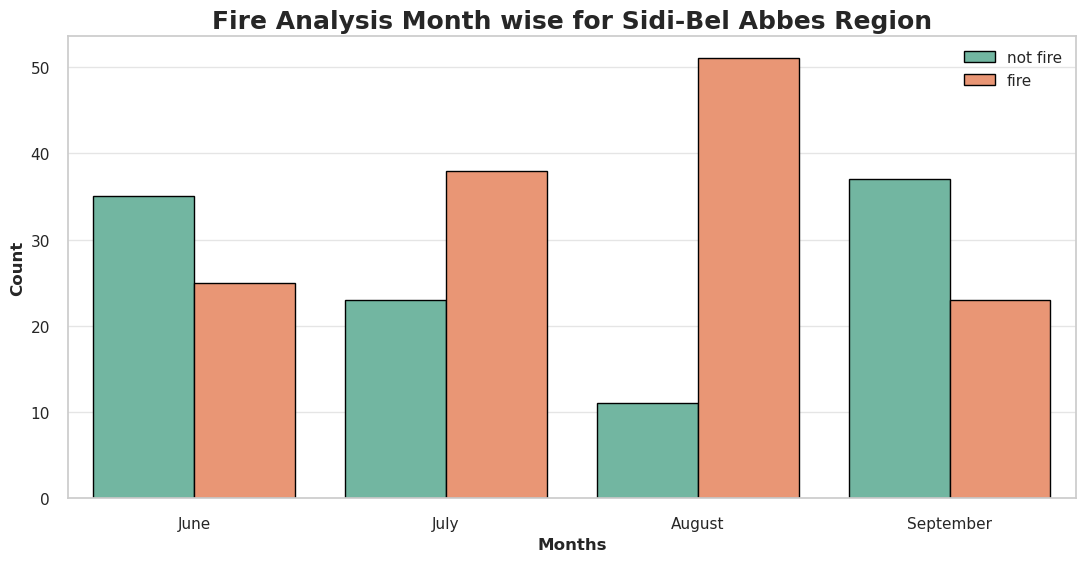

In [49]:
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [50]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

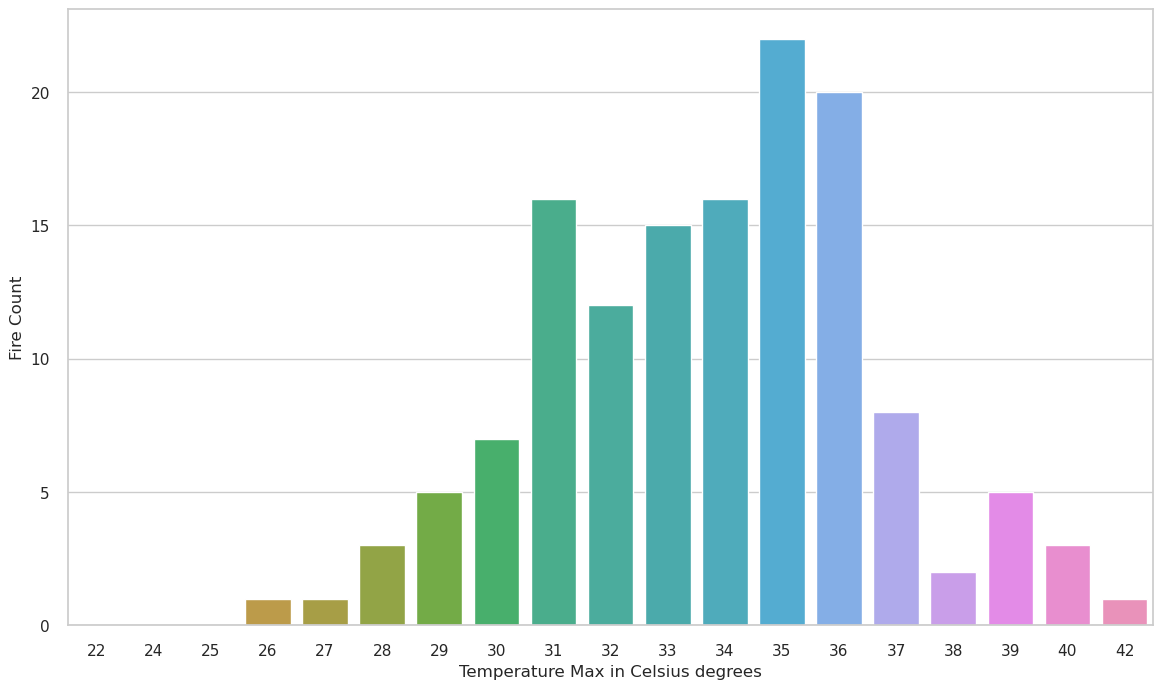

In [51]:
barchart('Temperature','Temperature Max in Celsius degrees')

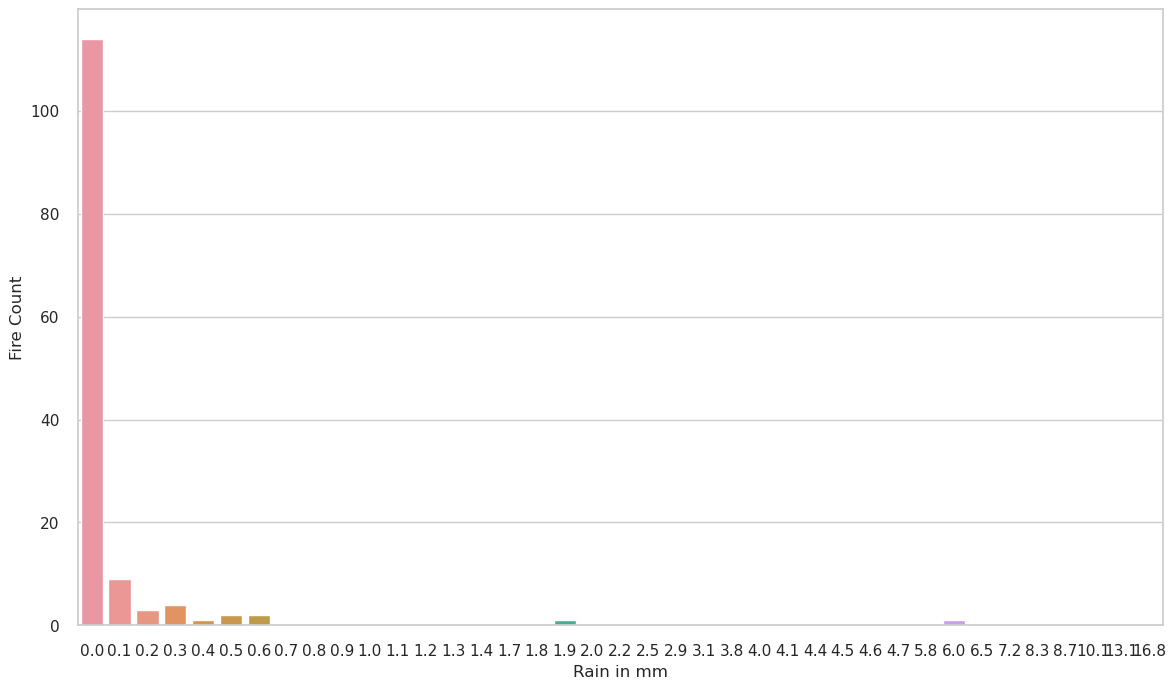

In [52]:
barchart('Rain', 'Rain in mm')

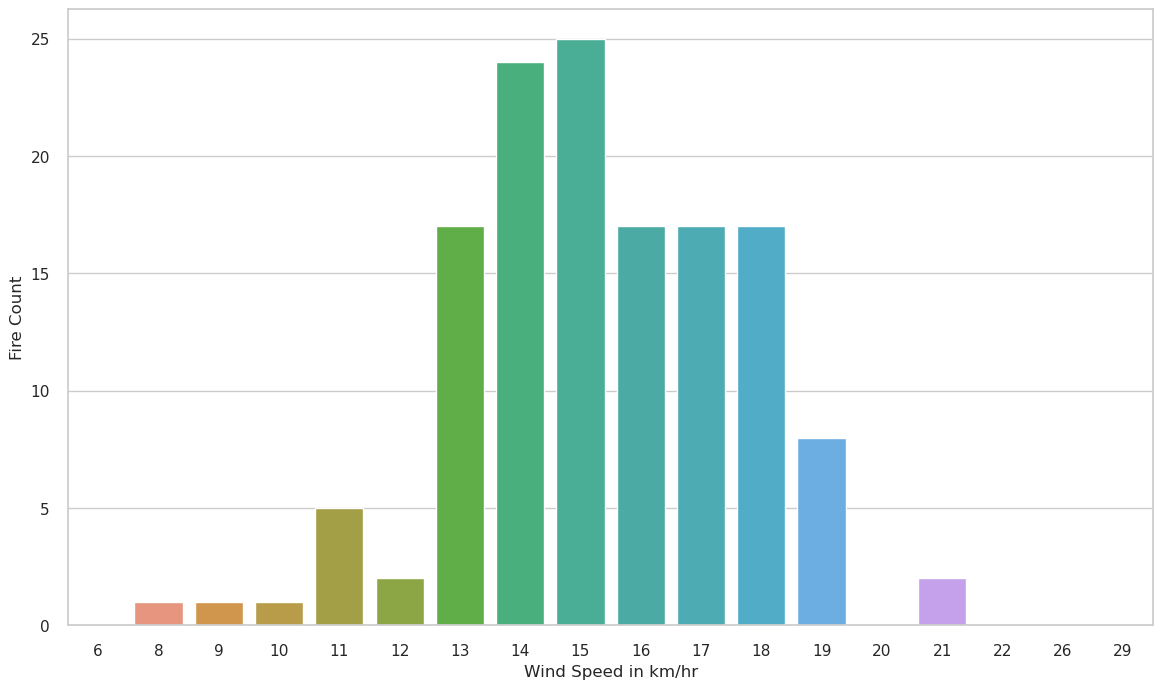

In [53]:
barchart('Ws', 'Wind Speed in km/hr')

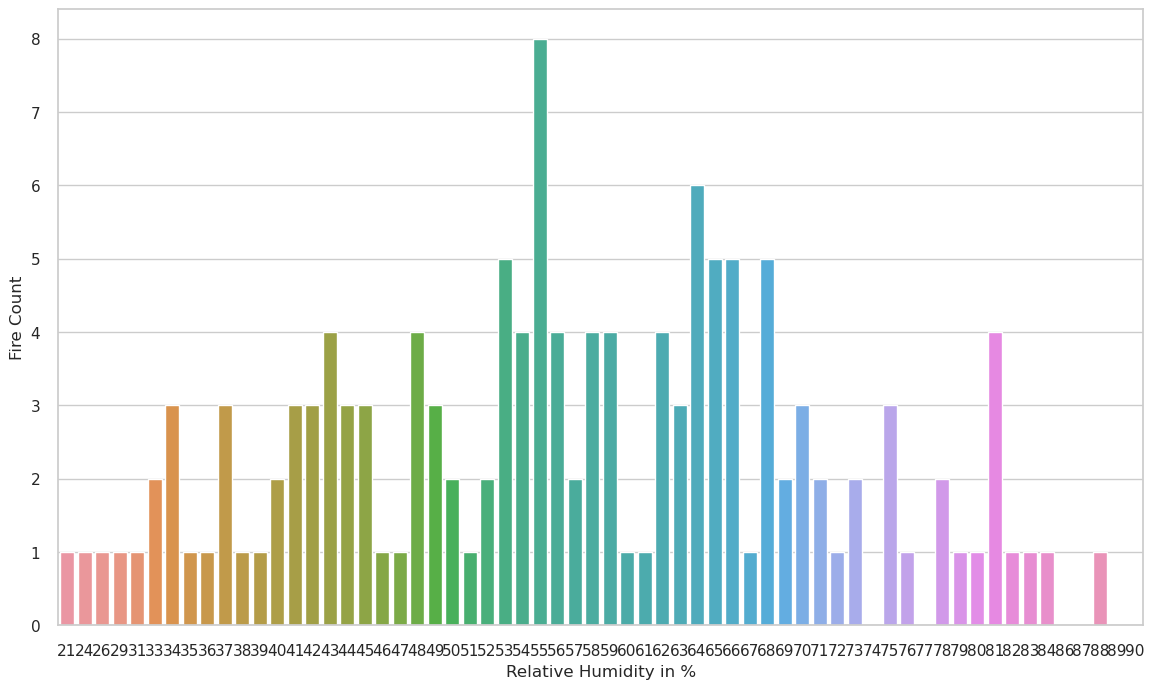

In [56]:
barchart('RH','Relative Humidity in %')

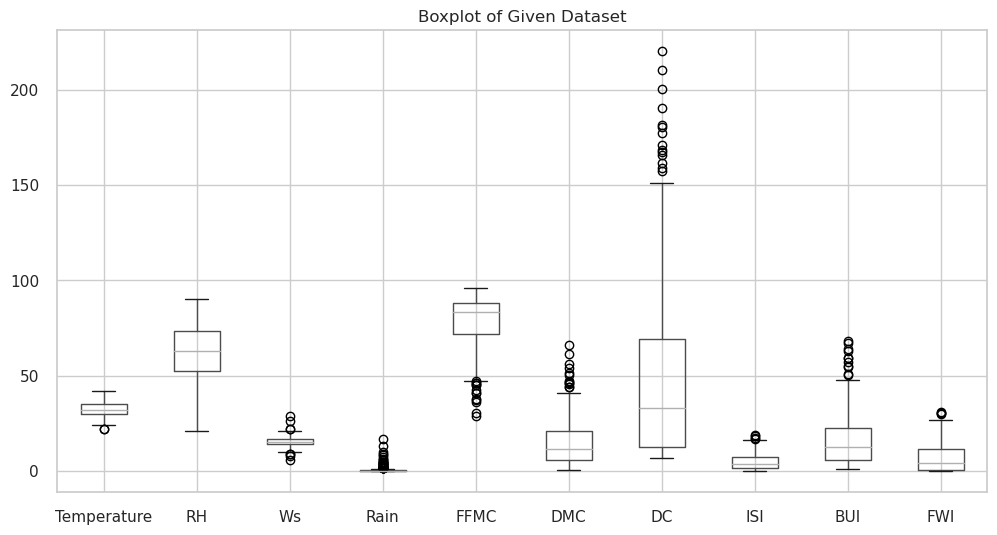

In [57]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

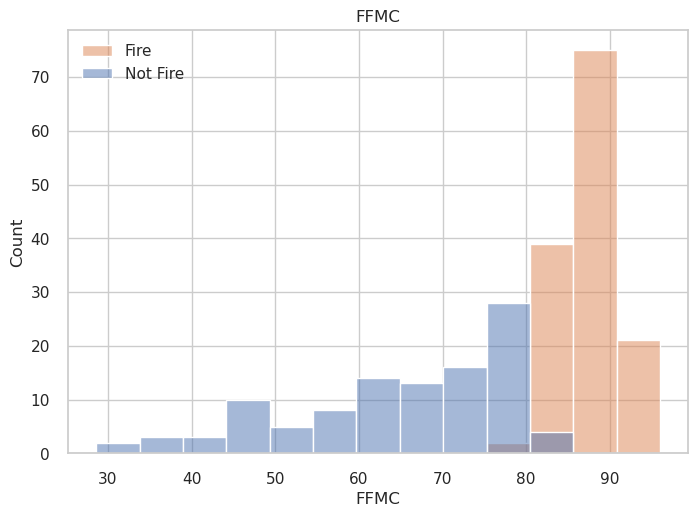

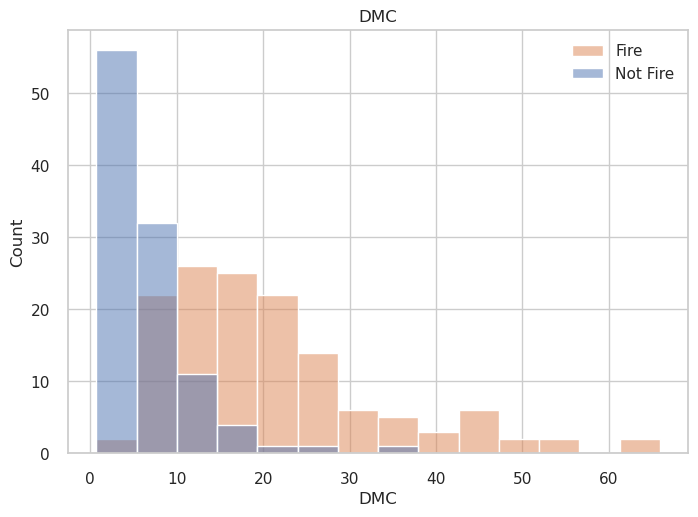

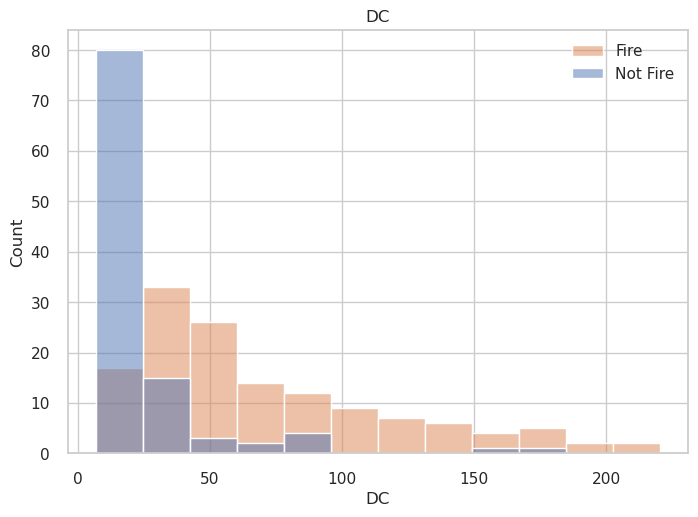

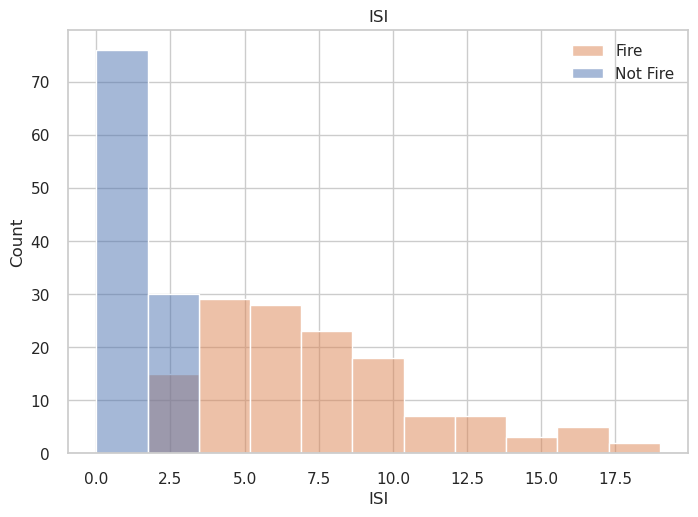

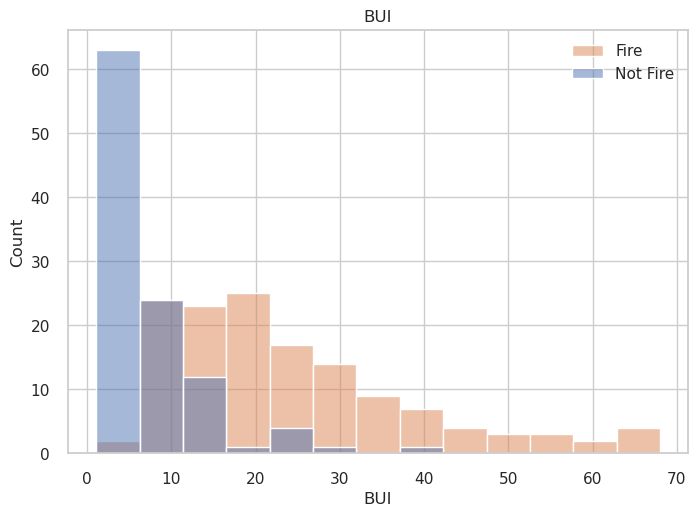

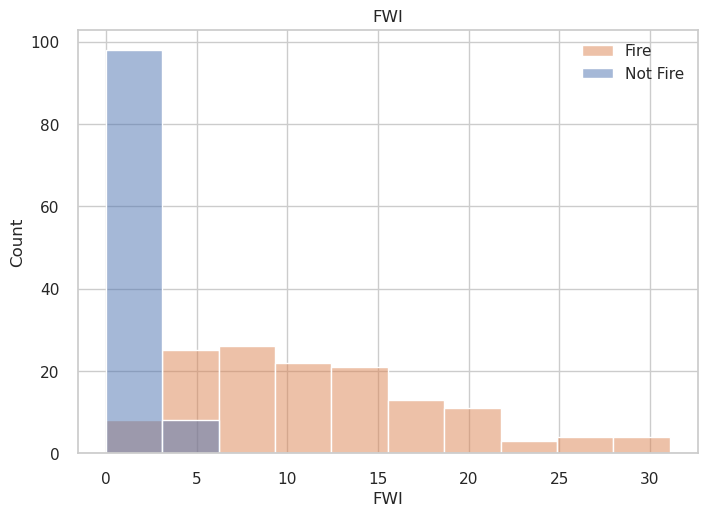

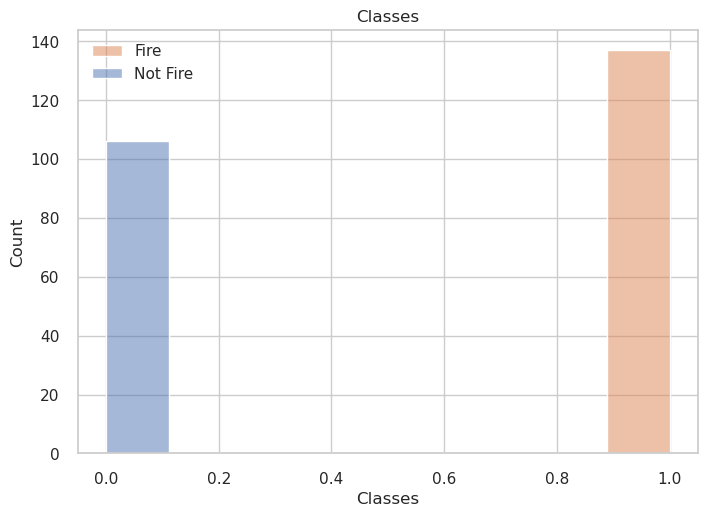

In [58]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

REPORT
Weather System Report
Temperature Highest Fire counts happened between 30-37 degree Celsius
Rain Highest Fire counts happened when there was no rain to very less rain ie. 0.0 to 0.3.
Wind Speed highest Fire count happened when the wind speed were between 13 to 19 Km/hr.
Relative Humidity highest fire count happened when the RH is between 50 to 80%.
FWI System Components Report
FWI (Canadian Forest Fire Weather Index)

Fine Fuel Moisture Code (FFMC) index which ranges between 28.6 to 92.5, here above 75 has higher chance of Forest fires.

Duff Moisture Code (DMC) index which ranges between 1.1 to 65.9, here 1.1-10 has lower chance of Forest fires whereas above 10-30 DMC has very high evidence of Forest fires in past.

Drought Code (DC) index which ranges between 7 to 220.4, here 0-25 is safe and has lower chance of Forest fires whereas range above 25 DC has higher chance of forest fires.

Initial Spread Index (ISI) index which ranges between 0 to 18, here 0-3 has lower Forest fires and above 3 ISI has higher chance of Forest fires.

Buildup Index (BUI) index which ranges between 1.1 to 68, here 1.1 to 10 has lower Forest fire chance and above 10 BUI has higher chance of forest fires.

Fire Weather Index (FWI) Index which ranges between 1 to 31.1, here 0-3 has lower chance of Forest fires and 3-25 FWI has higher chance of forest fires.